# Lab-6 SVM:
In this lab, we will see an examples of how to use SVM for classification tasks
## Lab-6 Objectives
1. SVM basics
2. Softmargin SVM.
3. Kernel SVM
### Recap

1. What is SVM? Is it used for classification or regression?

2. What are Support Vectors?

3. What is a Hyperplane?

4. What is a Margin?

5. How does SVM work?


#### Import libraries

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


* We will first consider the simple case of a classification task, in which the two classes of points are **well** separated into two classes:

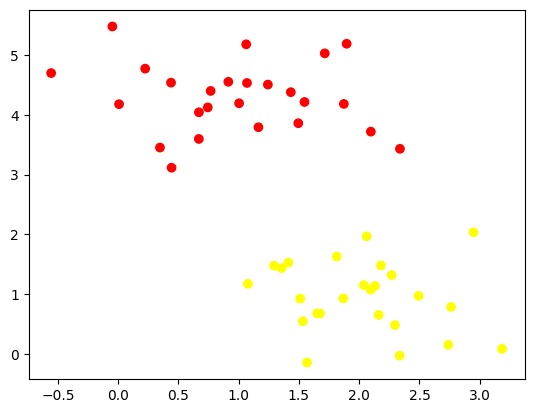

In [2]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='autumn')

* Мы проведем три линии, которые могут разделить эти два класса. В зависимости от того, какую линию вы выберете, новой точке данных (например, отмеченной на этом графике буквой "X") будет присвоена другая метка! Очевидно, нашей простой интуиции "провести линию между классами" недостаточно, и нам нужно учитывать **margin**.

(-1.0, 3.5)

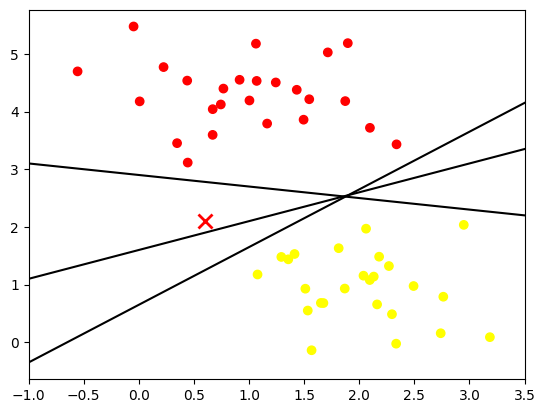

In [3]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y,  cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5)

* Мы проведем вокруг каждой линии **margin** некоторой ширины, вплоть до ближайшей точки. Линия, которая максимизирует эту маржу, будет выбрана в качестве оптимальной модели.

(-1.0, 3.5)

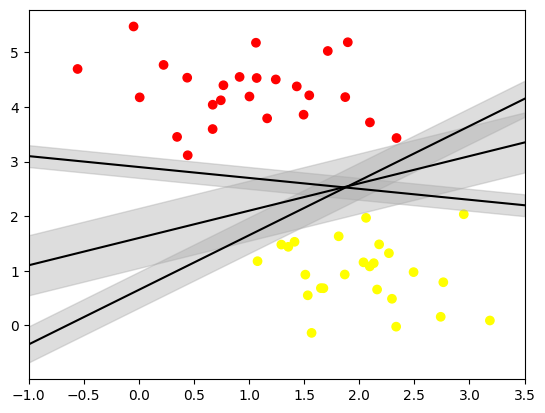

In [4]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y,  cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5)


### Support vector classifier
Fit a simple SVC for classifing the previous data

In [5]:
# Write your code here
from sklearn.svm import SVC

model = SVC(kernel="linear")
model.fit(X, y)

SVC(kernel='linear')

 ##### plot the svc decision function

Связь между подогнанным значением и предсказанием класса для данного наблюдения проста: если подогнанное значение больше нуля, то наблюдение относится к одному классу, а если меньше нуля, то к другому.

Для того чтобы получить подогнанные значения для данной SVM-модели, мы используем метод .𝚍𝚎𝚌𝚒𝚜𝚒𝚘𝚗⎯𝚏𝚞𝚗𝚌𝚝𝚒𝚘𝚗() из SVC

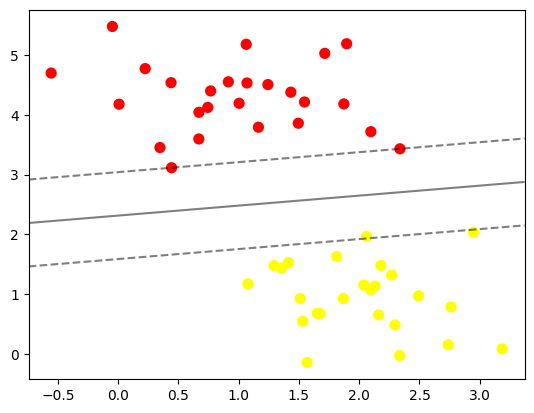

In [6]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])


    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

* Функция принятия решений SVM зависит от некоторого подмножества обучающих данных, называемого опорными векторами. Некоторые свойства этих векторов поддержки можно найти в атрибутах support_vectors_, support_ и n_support_:

In [7]:
# get support vectors
# get indices of support vectors
# get number of support vectors for each class
print("Support vectors :", model.support_vectors_)
print("Indices of the support vectors :", model.support_)
print("Number of the support vectors :", model.n_support_)

Support vectors : [[0.44359863 3.11530945]
 [2.33812285 3.43116792]
 [2.06156753 1.96918596]]
Indices of the support vectors : [18 25  7]
Number of the support vectors : [2 1]


* Посмотрим, как количество выборок влияет на модель svm и ее margin.

In [8]:
def plot_svm(N=10, ax=None, C=1E10):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.90)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=C)
    model.fit(X, y)

    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

In [9]:
!pip3 install ipywidgets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.5 MB/s eta 0:00:00


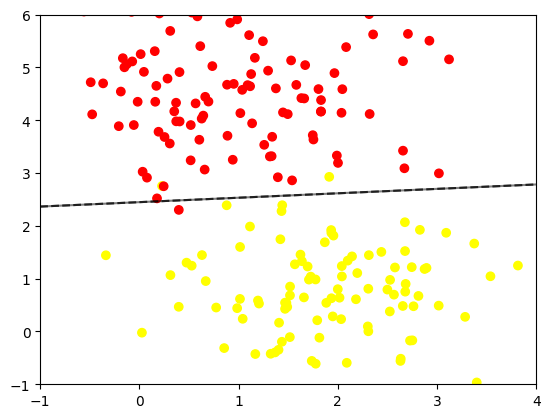

interactive(children=(Dropdown(description='N', options=(10, 100, 200), value=10), Dropdown(description='C', o…

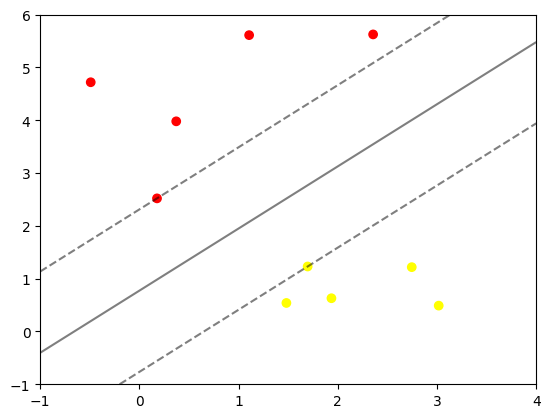

In [11]:
from ipywidgets import interact, fixed
interact(plot_svm, N=[10, 100, 200], C = [1E10, 1E5, 2, 4, 5], ax=fixed(None));

Аргумент 𝚌 позволяет определить стоимость нарушения границы. Если аргумент 𝚌 мал, то поля будут широкими, и многие опорные векторы будут находиться на границе или нарушать ее. Когда 𝚌-аргумент велик, то поля будут узкими, и будет мало опорных векторов, находящихся на поле или нарушающих поле.

Как найти оптимальный 𝚌-аргумент? n

Мы рассмотрим, как использовать SVM для классификации изображений рукописных цифр.

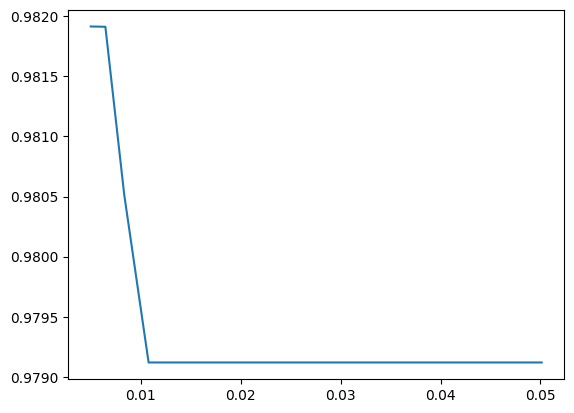

[0.9819129887727449, 0.981910569105691, 0.9805144212156408, 0.9791206929926443, 0.9791206929926443, 0.9791206929926443, 0.9791206929926443, 0.9791206929926443, 0.9791206929926443, 0.9791206929926443]
0.005011872336272725


In [12]:
from sklearn.model_selection import cross_val_score
import matplotlib.pylab as plt
import numpy as np
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits



X, y = load_digits(return_X_y=True)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state =123)
Cs = np.logspace(-2.3, -1.3, 10)
cv_scores = []
# Use cross_val_score for finding the bect c from Cs
for c in Cs:
    model = SVC(kernel="linear", C=c)
    score = cross_val_score(model, x_train, y_train, cv=5, scoring="accuracy")
    cv_scores.append(np.mean(score))

plt.plot(Cs, cv_scores)
plt.show()
print(cv_scores)
print(Cs[np.argmax(cv_scores)])

* Print classification_report, confusion_matrix for the a model with the best c argument

In [13]:
from sklearn.metrics import classification_report, confusion_matrix
# fit SVM model with the best c argument
#Print classification_report, confusion_matrix for the  model

model = SVC(kernel="linear", C = Cs[np.argmax(cv_scores)])
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       0.87      1.00      0.93        34
           2       1.00      1.00      1.00        36
           3       1.00      1.00      1.00        33
           4       1.00      1.00      1.00        42
           5       1.00      0.92      0.96        37
           6       1.00      0.98      0.99        43
           7       0.97      1.00      0.98        31
           8       1.00      0.89      0.94        37
           9       0.93      1.00      0.97        28

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360

[[39  0  0  0  0  0  0  0  0  0]
 [ 0 34  0  0  0  0  0  0  0  0]
 [ 0  0 36  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  0  0  0  0  0]
 [ 0  0  0  0 42  0  0  0  0  0]
 [ 0  0  0  0  0 34  0  1  0  2]
 [ 0  1  0  0  0  0 42  0  0  0]
 [ 0  0  0

## Kernel SVM

1. What is called a kernel trick?

### Most popular kernel types

![image.png](image.png)



### Generating data

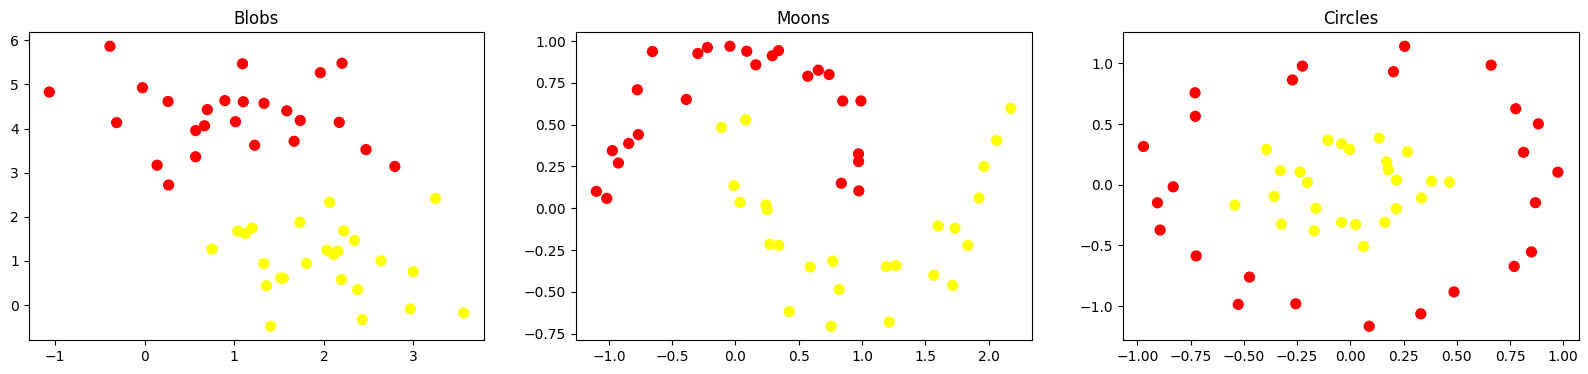

In [18]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs, make_moons, make_circles

# here we assign values for constants
n_samples = 50
C_const = 100

plt.figure(figsize=(20,4))

# generating linearly separable data
X_blob, Y_blob = make_blobs(n_samples=n_samples, centers=2, random_state=0, cluster_std=0.8)
plt.subplot(131)
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=Y_blob, s=50, cmap='autumn')
plt.title("Blobs")

# generating moon-shaped data
X_moon, Y_moon = make_moons(n_samples=n_samples, noise=0.1, random_state=0)
plt.subplot(132)
plt.title("Moons")
plt.scatter(X_moon[:, 0], X_moon[:, 1], c=Y_moon, s=50, cmap='autumn')

# generating concentric data
X_circle, Y_circle = make_circles(n_samples=n_samples, factor=0.3, noise=0.1, random_state=0)
plt.subplot(133)
plt.title("Circles")
plt.scatter(X_circle[:, 0], X_circle[:, 1], c=Y_circle, s=50, cmap='autumn')
plt.show()

In [19]:
# plotting function from the last lab, for your use
def plot_svc_decision_function(model, ax=None, plot_support=False):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=30, marker = "x", color="k")
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

### Trying out different kernels

Задача: Для каждого набора данных попробуйте использовать не менее трех kernels (linear, rbf, polynomial) с параметрами по умолчанию и постройте график результатов. Проанализируйте их.

In [22]:
# test kernels for each dataset
from sklearn.svm import SVC
def test_kernels(X, Y):
    plt.figure(figsize=(24, 5))

    linear_model = SVC(kernel="linear")
    linear_model.fit(X,Y)
    plt.subplot(131)
    plt.scatter(X[:, 0], X[:, 1], c=Y)
    plt.title("Linear Kernel")
    plot_svc_decision_function(linear_model)

    gaussian_model = SVC(kernel="rbf")
    gaussian_model.fit(X,Y)
    plt.subplot(132)
    plt.scatter(X[:, 0], X[:, 1], c=Y)
    plt.title("RBF Kernel")
    plot_svc_decision_function(gaussian_model)

    poly_model = SVC(kernel="poly")
    poly_model.fit(X,Y)
    plt.subplot(133)
    plt.scatter(X[:, 0], X[:, 1], c=Y)
    plt.title("Polynomial Kernel")
    plot_svc_decision_function(poly_model)

    plt.show()

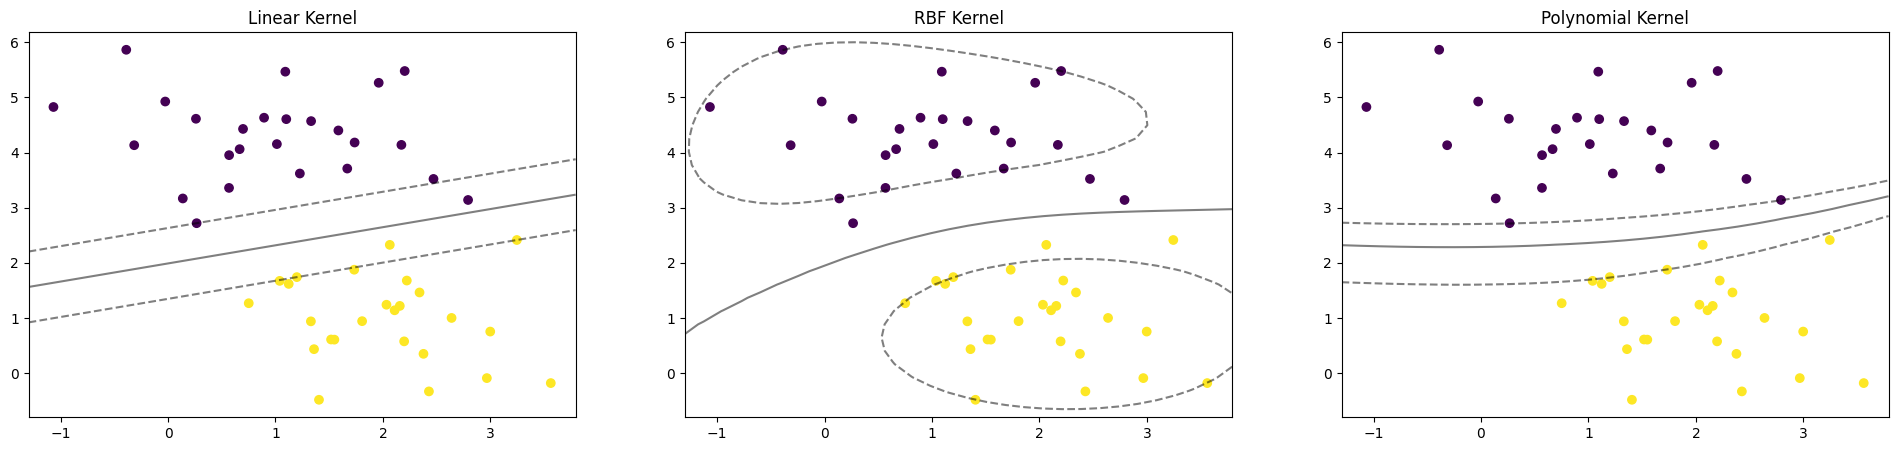

In [23]:
# test kernels for each dataset
# this is the approximate output you should get for the blobs dataset
test_kernels(X_blob, Y_blob)

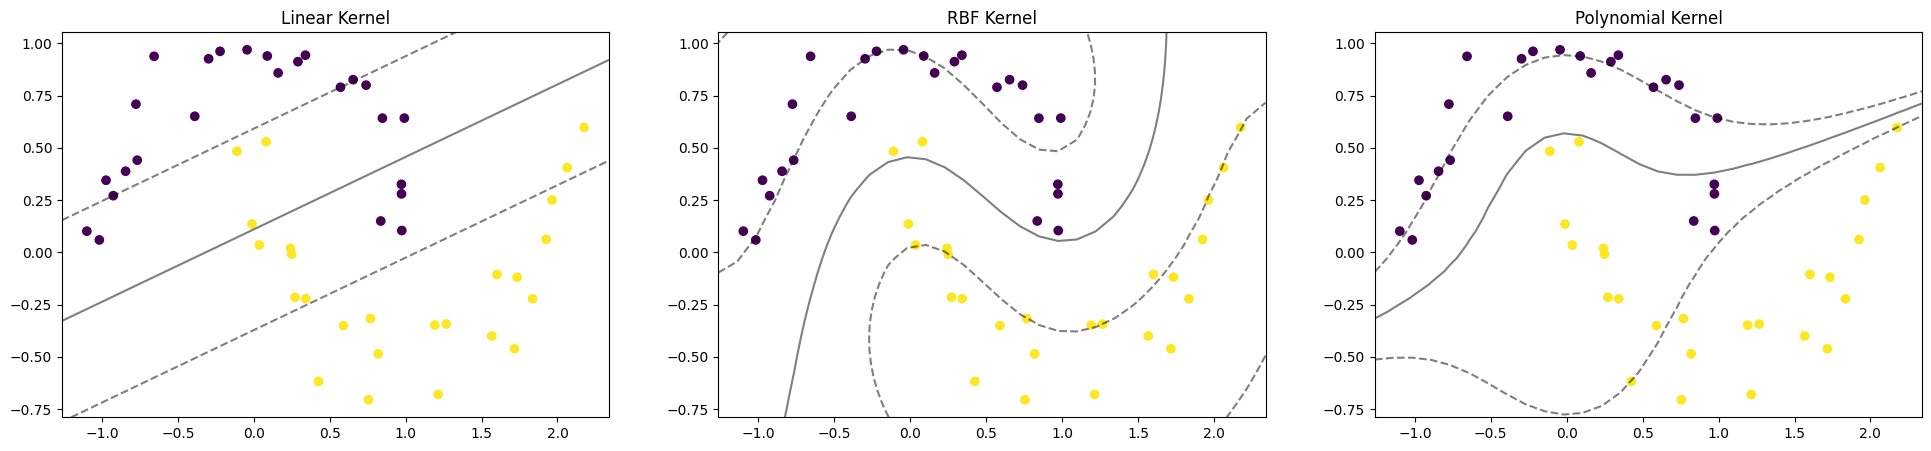

In [24]:
test_kernels(X_moon, Y_moon)

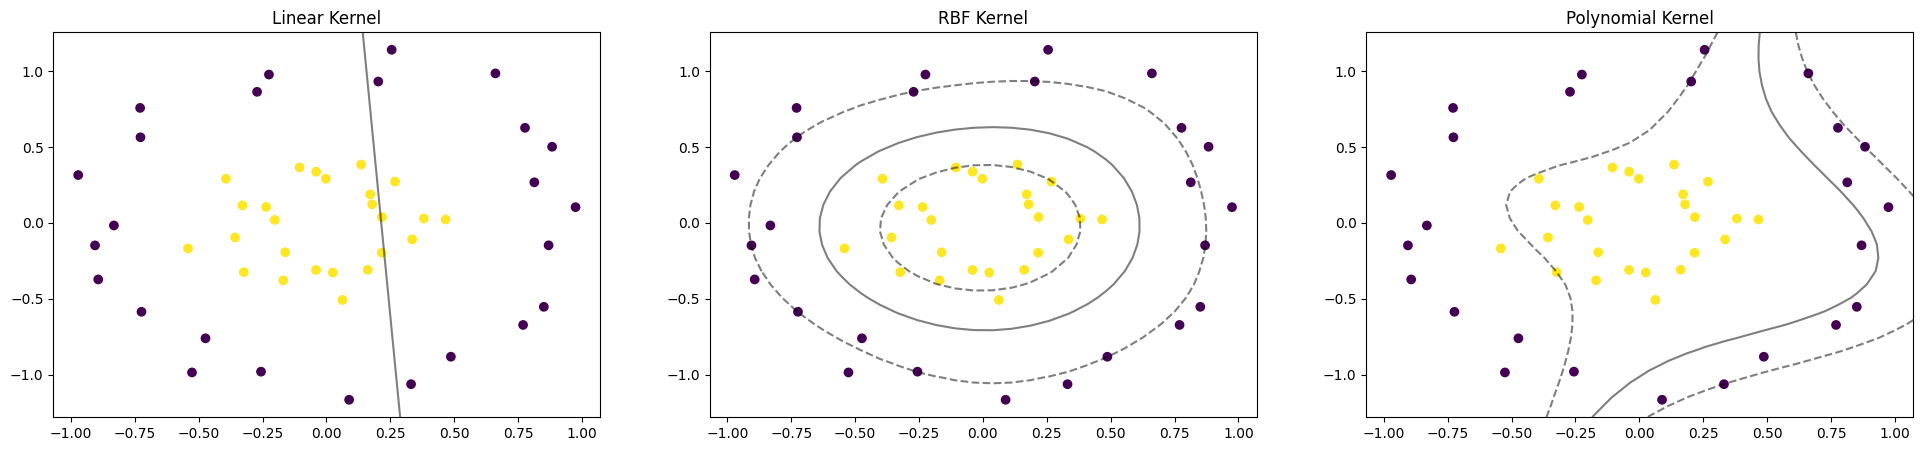

In [25]:
test_kernels(X_circle, Y_circle)

### Exploring parameters effect
Task: Попробуйте поиграть с параметрами C, gamma, degree на наборе данных лун - выберите те, которые покажутся вам наиболее удачными.

**gamma** - определяет, насколько близко точка должна находиться к гиперплоскости, чтобы оказывать на нее какое-либо влияние. Чем ниже гамма, тем больше элементов, даже находящихся достаточно далеко от разделительной линии, участвуют в процессе выбора этой самой линии. Если же гамма высока, то алгоритм будет "опираться" только на те элементы, которые находятся ближе всего к самой линии.

Если вы установите слишком высокий уровень гаммы, то в процессе принятия решения о положении линии будут участвовать только ближайшие к ней элементы. Это поможет игнорировать провалы в данных.



![alt text](https://dinhanhthi.com/img/post/ML/support-vector-machine/svm-5.jpg)

In [ ]:
# Manually tune parameters for the moons dataset, plotting the result
def test_gamma(gamma=1):
    gaussian_model = SVC(kernel="rbf", gamma=gamma)
    gaussian_model.fit(X_moon,Y_moon)
    plt.scatter(X_moon[:, 0], X_moon[:, 1], c=Y_moon)
    plt.title("RBF Kernel")
    plot_svc_decision_function(gaussian_model)

def test_degree(degree=1):
    gaussian_model = SVC(kernel="poly", degree=degree)
    gaussian_model.fit(X_moon,Y_moon)
    plt.scatter(X_moon[:, 0], X_moon[:, 1], c=Y_moon)
    plt.title("RBF Kernel")
    plot_svc_decision_function(gaussian_model)

In [ ]:
interact(test_gamma, gamma=[0, 1, 2, 3, 1E3])

interactive(children=(Dropdown(description='gamma', index=1, options=(0, 1, 2, 3, 1000.0), value=1), Output())…

<function __main__.test_gamma(gamma=1)>

In [ ]:
interact(test_degree, degree=[1, 2, 5, 3,11, 10, 14])

interactive(children=(Dropdown(description='degree', options=(1, 2, 5, 3, 11, 10, 14), value=1), Output()), _d…

<function __main__.test_degree(degree=1)>